In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [288]:
df = pd.read_csv("C:\AI\kNN\/breast-cancer-wisconsin.data.txt", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Các thuộc tính chưa có tên nên ta cần đặt tên cho chúng, cột cuối là label

In [289]:
df.columns = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df = df.drop(['Id'], axis = 1)
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Làm sạch dữ liệu
- Xử lý dữ liệu NaN
- Xử lý dữ liệu sai về:
    - Hình thức: Sai định dạng, thiếu giá trị
    - Nội dung: Outlier, giá trị sai

In [290]:
df.shape

(699, 10)

In [291]:
df.dtypes

Clump_thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [292]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [293]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [294]:
df = df.dropna(axis=0)
df.shape

(683, 10)

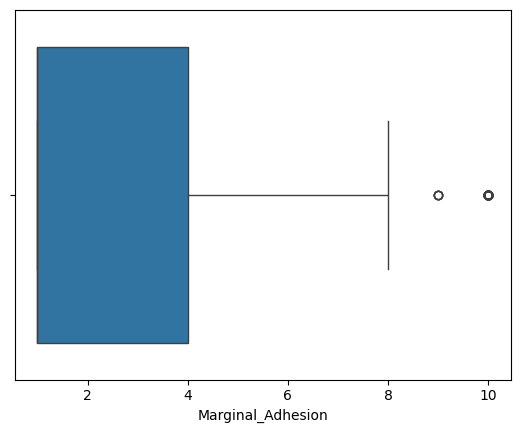

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df['Marginal_Adhesion'].astype(float)  # Dữ liệu cần vẽ boxplot

sns.boxplot(x=data)
plt.show()

In [296]:
# def identify_outliers(data):
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     outliers = [value for value in data if value < lower_bound or value > upper_bound]
#     return outliers
# outliers = identify_outliers(df['Marginal_Adhesion'])
# outliers
# df = df[~df['Marginal_Adhesion'].isin(outliers)]

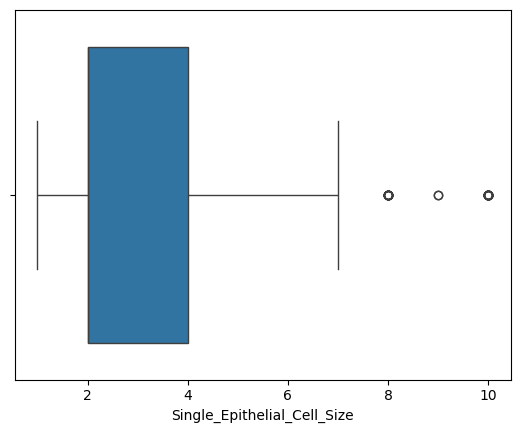

In [297]:
data = df['Single_Epithelial_Cell_Size'].astype(float)  # Dữ liệu cần vẽ boxplot

sns.boxplot(x=data)
plt.show()

In [298]:
# outliers = identify_outliers(df['Single_Epithelial_Cell_Size'])
# df = df[~df['Single_Epithelial_Cell_Size'].isin(outliers)]

# outliers = identify_outliers(df['Bare_Nuclei'])
# df = df[~df['Bare_Nuclei'].isin(outliers)]

# # outliers = identify_outliers(df['Bland_Chromatin'])
# # df = df[~df['Bland_Chromatin'].isin(outliers)]

# outliers = identify_outliers(df['Normal_Nucleoli'])
# df = df[~df['Normal_Nucleoli'].isin(outliers)]

In [299]:
df.shape

(683, 10)

In [300]:
X = df.values[:,:9]
y = df['Class'] 

In [301]:
# tách training và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

In [302]:
X_train

array([[4., 2., 2., ..., 2., 1., 1.],
       [3., 1., 1., ..., 1., 1., 1.],
       [5., 1., 1., ..., 3., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [5., 1., 1., ..., 1., 1., 1.],
       [4., 1., 1., ..., 1., 1., 1.]])

Chọn giá trị K bằng elbow

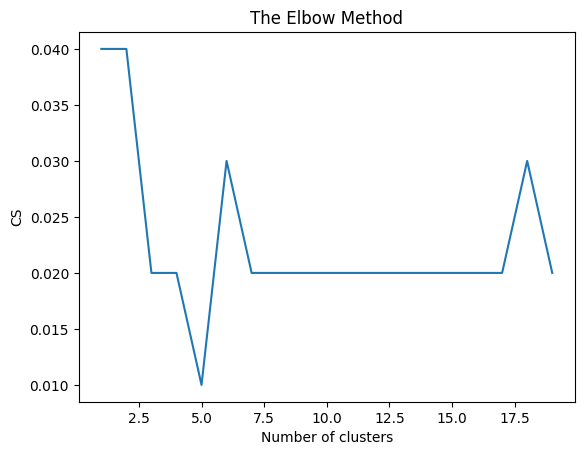

In [303]:
error_rate = []
for i in range(1,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # tỷ lệ lỗi trung bình
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 20), error_rate)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [308]:
bc = neighbors.KNeighborsClassifier(n_neighbors = 5, p =2)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

In [309]:
print(np.array(y_test)) 
print(y_pred)

[4 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 2
 4 2 4 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 2 2 4 4 2 4 2 2]
[4 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2 4 2 2 2
 4 2 4 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 2 2 4 4 2 4 2 2]


In [310]:
"Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred))


'Accuracy of 1NN: 99.00 %'

In [316]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 2, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))


Accuracy of 10NN (1/distance weights): 96.00 %
